# Magnetic Susceptibility Plots and Data Analysis

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Load data

In [2]:
data = np.loadtxt('data.csv',delimiter=',',skiprows=1,dtype='str')

dmhigh = -1*data[:,1].astype('float')       # [g]
dmlow = -1*data[:,2].astype('float')        # [g]
dmerr = data[:,3].astype('float')           # [g]
As = data[0:16,7].astype('float')           # [m]
Aserr = data[0:16,8].astype('float')        # [m^2]
dmhighreal = data[0:16,5].astype('float')   # [g]
dmerrreal = data[0:16,6].astype('float')    # [g]
chivals = data[0:16,9].astype('float')
chierrs = data[0:16,10].astype('float')
labels = data[0:16,4]

## dmhigh vs dmlow plot

Text(0.5, 0, '$\\Delta m_{low}$ [g]')

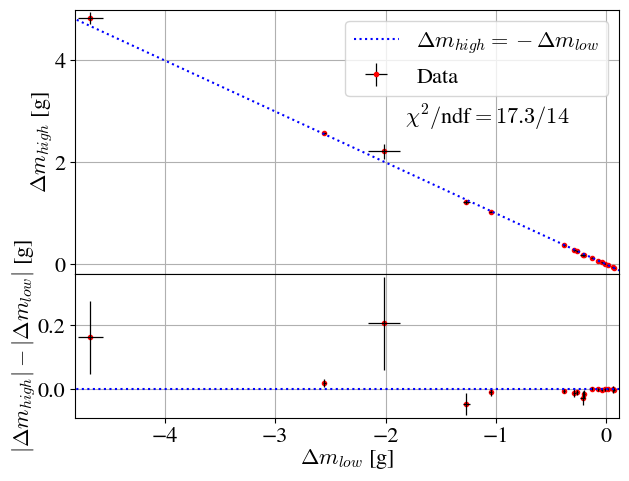

In [48]:
diff = abs(dmhigh)-abs(dmlow)
chi2 = sum(diff**2/dmerr**2)
ndf = 14
chi2nu = chi2/ndf

fig=plt.figure()
frame1 = fig.add_axes((.1,.4,.85,.55))

plt.errorbar(dmlow,dmhigh,yerr=dmerr,xerr=dmerr,fmt='or',label='Data',barsabove=True,markersize=3,ecolor='black',elinewidth=.9,capsize=0)
plt.plot((-6,6),(6,-6),'b:',label=r'$\Delta m_{high}=-\Delta m_{low}$')
plt.xlim(-4.81,0.12)
plt.ylim(-0.18,5)
plt.legend(fontsize=16)
plt.text(-1.82,2.75,fr'$\chi^2/$ndf$={chi2:0.1f}/{ndf}$',fontsize=16)
plt.grid()
frame1.set_xticklabels([])
plt.tick_params(labelsize=16)
plt.ylabel(r'$\Delta m_{high}$ [g]',fontsize=16,labelpad=0)

frame2 = fig.add_axes((.1,.1,.85,.3))
plt.errorbar(dmlow,diff,fmt='or',yerr=dmerr,xerr=dmerr,markersize=3,barsabove=True,ecolor='black',elinewidth=.9)
plt.plot((-6,5),(0,0),'b:')
plt.xlim(-4.81,0.12)
plt.ylim(-.09,0.36)
plt.grid()
plt.tick_params(labelsize=16)
plt.ylabel(r'$|\Delta m_{high}|-|\Delta m_{low}|$ [g]',fontsize=16,labelpad=0)
plt.xlabel(r'$\Delta m_{low}$ [g]',fontsize=16,labelpad=0)

#plt.savefig('high_v_low_fig.pdf')

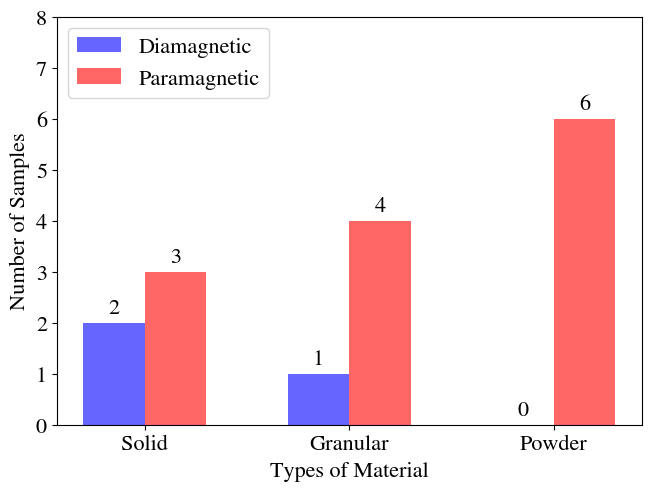

In [51]:
paramask = chivals > 0
diamask = chivals < 0

whichpara = labels[paramask]
whichdia = labels[diamask]

whichsolid = ['1','2','3','5','6']
whichgranular = ['4','7','10','12','15']
whichpowder = ['8','9','11','13','14','16']

types = ("Solid", "Granular", "Powder")
values = {
    'Diamagnetic': (2, 1,0),
    'Paramagnetic': (3, 4,6)
}

x = np.arange(len(types))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for key, val in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=key,color='blue' if key=='Diamagnetic' else 'red',alpha=.6)
    ax.bar_label(rects, padding=3,fontsize=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Samples',fontsize=16)
plt.xlabel('Types of Material',fontsize=16,labelpad=5)
ax.set_xticks(x + width/2, types,fontsize=16)
ax.legend(fontsize=16,loc='upper left')
ax.set_ylim(0, 8)
plt.tick_params(labelsize=16)

plt.savefig('histtypes.pdf')